In [1]:
import pandas as pd

In [2]:
db = pd.read_csv('diabetesLogistic.csv')

In [3]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Handling Null

In [4]:
db.isnull().sum()[db.isnull().sum()>0]

Series([], dtype: int64)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Sampling

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_db,test_db = train_test_split(db,test_size=0.2)

In [8]:
print(db.shape," ",train_db.shape, " ",test_db.shape)

(768, 9)   (614, 9)   (154, 9)


In [9]:
train_db_x = train_db.iloc[ : , :-1]
train_db_y = train_db.iloc[ : , -1]

In [10]:
test_db_x = test_db.iloc[ : , :-1]
test_db_y = test_db.iloc[ : , -1]

### Model Building

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [12]:
logreg.fit(train_db_x,train_db_y)

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [13]:
pred = logreg.predict(test_db_x)
pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
tab = confusion_matrix(test_db_y,pred)
tab

array([[86,  7],
       [22, 39]], dtype=int64)

### Accuracy

In [16]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy

81.16883116883118

### Recall SCore

In [17]:
from sklearn.metrics import recall_score

In [18]:
recall_score(test_db_y,pred)*100

63.934426229508205

### Precision

In [19]:
from sklearn.metrics import precision_score

In [20]:
precision_score(test_db_y,pred)*100

84.78260869565217

### F1 Score

In [21]:
from sklearn.metrics import f1_score

In [22]:
f1_score(test_db_y,pred)*100

72.89719626168225

### AuRoc

In [23]:
from sklearn.metrics import roc_auc_score,roc_curve

In [24]:
pred_prob = logreg.predict_proba(test_db_x)
pred_prob

array([[0.82101964, 0.17898036],
       [0.74858835, 0.25141165],
       [0.35454919, 0.64545081],
       [0.96079782, 0.03920218],
       [0.15060672, 0.84939328],
       [0.33234737, 0.66765263],
       [0.41095   , 0.58905   ],
       [0.92909785, 0.07090215],
       [0.92110634, 0.07889366],
       [0.93056821, 0.06943179],
       [0.72855243, 0.27144757],
       [0.95094341, 0.04905659],
       [0.72604006, 0.27395994],
       [0.77438911, 0.22561089],
       [0.7280097 , 0.2719903 ],
       [0.97000068, 0.02999932],
       [0.63967667, 0.36032333],
       [0.31433896, 0.68566104],
       [0.25876189, 0.74123811],
       [0.98012837, 0.01987163],
       [0.92623761, 0.07376239],
       [0.66997653, 0.33002347],
       [0.48957947, 0.51042053],
       [0.91800756, 0.08199244],
       [0.6162992 , 0.3837008 ],
       [0.33705141, 0.66294859],
       [0.7008124 , 0.2991876 ],
       [0.24154497, 0.75845503],
       [0.69166077, 0.30833923],
       [0.07780721, 0.92219279],
       [0.

In [25]:
roc_auc_score(test_db_y,pred_prob[ : , 1])


0.8598625066102591

In [26]:
fpr, tpr, thresh = roc_curve(test_db_y,pred_prob[ : ,1])

In [27]:
import matplotlib.pyplot as plt

Text(0.3, 0.5, 'Area under curve is 0.82')

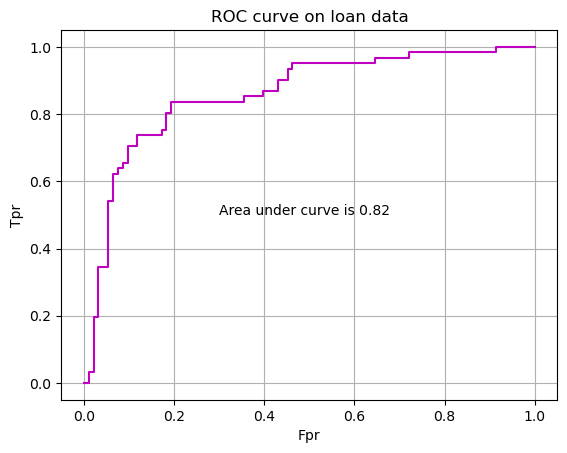

In [28]:
plt.plot(fpr,tpr, color = 'm')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve on loan data')
plt.grid()
plt.text(x=.3,y=.5,s = "Area under curve is 0.82")

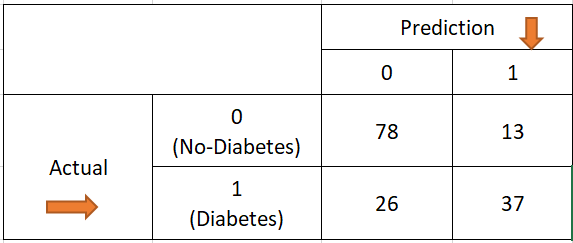

In [30]:
from IPython import display
display.Image('db.PNG')